# Dogs breeds

https://youtu.be/JNxcznsrRb8?t=1h31m8s

In [7]:
??ConvLearner.pretrained


In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from random import sample

In [40]:
torch.cuda.set_device(1)

In [41]:
PATH = "data/drugs/pics/"
sz = 224
arch = resnext101_64
bs = 128
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n, seed=random.sample(range(9), 1)) # random 20% data for validation set, different each time

## Initial model

In [42]:
def get_data(sz, bs): # sz: image size, bs: batch size
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv',
                                       val_idxs=val_idxs, suffix='.png', tfms=tfms, bs=bs)
    
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/13
    # http://forums.fast.ai/t/how-to-train-on-the-full-dataset-using-imageclassifierdata-from-csv/7761/37
    return data if sz > 300 else data.resize(340, 'tmp') # Reading the jpgs and resizing is slow for big images, so resizing them all to 340 first saves time


### Precompute

In [47]:
def k_fold_cross_loop1(k, epochs):
    validation_accuracy = []
    for reps in range(k):
        val_idxs = get_cv_idxs(n, seed=random.sample(range(1000), 1)) # random 20% data for validation set
        data = get_data(sz, bs)
        learn = ConvLearner.pretrained(arch, data, precompute=True)
        learn.fit(1e-2, epochs)
        validation_accuracy.append(val_acc)
        learn.save(str(reps)+'_12clsmodel_kfold.model')
    return validation_accuracy

In [48]:
v_a = k_fold_cross_loop1(10,100)

epoch      trn_loss   val_loss   accuracy                 
    0      2.070548   1.669185   0.429075  
    1      1.76888    1.556218   0.46652                  
    2      1.645123   1.498228   0.482379                  
    3      1.545225   1.455022   0.494273                  
    4      1.480391   1.424      0.497357                 
    5      1.422637   1.385548   0.511454                 
    6      1.381897   1.341969   0.517181                 
    7      1.324599   1.327606   0.532159                 
    8      1.290708   1.325242   0.532159                 
    9      1.267365   1.307441   0.54141                   
    10     1.229282   1.292712   0.534361                  
    11     1.208318   1.281906   0.547137                  
    12     1.167715   1.278463   0.546696                 
    13     1.14537    1.268767   0.548018                 
    14     1.109101   1.2657     0.548018                 
    15     1.101349   1.247311   0.562555                 
    16 

epoch      trn_loss   val_loss   accuracy                 
    0      2.082087   1.680048   0.448018  
    1      1.790978   1.573119   0.445815                 
    2      1.633364   1.496212   0.478414                 
    3      1.541974   1.448939   0.488987                 
    4      1.492486   1.421354   0.502203                 
    5      1.438499   1.395803   0.511894                 
    6      1.383618   1.377353   0.508811                 
    7      1.351633   1.365814   0.501762                 
    8      1.306841   1.33187    0.528634                 
    9      1.276673   1.331444   0.534361                 
    10     1.234611   1.311445   0.534361                 
    11     1.201428   1.3091     0.530396                 
    12     1.181753   1.291834   0.539207                 
    13     1.172887   1.275719   0.545815                 
    14     1.148957   1.282912   0.546696                 
    15     1.109257   1.271912   0.543172                 
    16     1

epoch      trn_loss   val_loss   accuracy                 
    0      2.075945   1.67589    0.43348   
    1      1.768355   1.555436   0.463436                 
    2      1.628673   1.482706   0.481938                 
    3      1.542327   1.453784   0.486784                 
    4      1.473394   1.400499   0.509692                 
    5      1.419219   1.368242   0.51674                  
    6      1.36255    1.365166   0.518502                 
    7      1.318509   1.335945   0.533921                 
    8      1.288755   1.330634   0.526432                 
    9      1.255152   1.320169   0.530396                 
    10     1.224379   1.296715   0.548018                 
    11     1.200319   1.280242   0.557709                 
    12     1.168186   1.265933   0.559912                 
    13     1.145757   1.264515   0.555947                 
    14     1.124273   1.275745   0.555066                 
    15     1.101011   1.265241   0.549339                 
    16     1

epoch      trn_loss   val_loss   accuracy                 
    0      2.058092   1.682293   0.431278  
    1      1.770803   1.590136   0.459912                 
    2      1.63962    1.517988   0.467401                 
    3      1.552602   1.463593   0.485022                 
    4      1.480642   1.419397   0.503084                 
    5      1.42187    1.393795   0.517621                 
    6      1.366614   1.363929   0.514097                 
    7      1.338306   1.355018   0.519824                 
    8      1.29881    1.330372   0.52511                  
    9      1.26282    1.338571   0.532159                 
    10     1.23036    1.306958   0.53304                  
    11     1.19982    1.294975   0.537445                 
    12     1.182761   1.296886   0.546696                 
    13     1.152609   1.266105   0.544493                 
    14     1.128042   1.264656   0.550661                 
    15     1.126551   1.258455   0.551542                 
    16     1

epoch      trn_loss   val_loss   accuracy                 
    0      2.075494   1.683606   0.424229  
    1      1.779713   1.578465   0.454626                 
    2      1.641441   1.512408   0.472687                 
    3      1.540287   1.453068   0.493833                 
    4      1.470331   1.439515   0.503524                 
    5      1.424656   1.390363   0.509251                 
    6      1.375353   1.372593   0.514097                 
    7      1.344349   1.346982   0.519383                 
    8      1.298948   1.339111   0.526872                 
    9      1.263226   1.330409   0.535242                 
    10     1.227147   1.311091   0.545374                 
    11     1.211222   1.303971   0.533921                 
    12     1.177912   1.291893   0.540088                 
    13     1.154132   1.288125   0.543172                 
    14     1.114563   1.26843    0.552423                  
    15     1.107407   1.26738    0.548458                  
    16    

epoch      trn_loss   val_loss   accuracy                 
    0      2.062443   1.663398   0.444493  
    1      1.776037   1.548098   0.463436                 
    2      1.638831   1.489166   0.476211                 
    3      1.545082   1.43153    0.493392                 
    4      1.470115   1.401145   0.504846                 
    5      1.410552   1.374518   0.519383                 
    6      1.352297   1.355153   0.515419                 
    7      1.322183   1.355286   0.520705                 
    8      1.287429   1.327886   0.52467                  
    9      1.243965   1.312452   0.537445                 
    10     1.227162   1.303163   0.528634                 
    11     1.190456   1.282146   0.539648                  
    12     1.169072   1.300047   0.543612                 
    13     1.163871   1.280539   0.54141                  
    14     1.13802    1.266065   0.54978                  
    15     1.102924   1.285507   0.540969                 
    16     

epoch      trn_loss   val_loss   accuracy                 
    0      2.063038   1.685731   0.414978  
    1      1.764446   1.562178   0.446256                 
    2      1.629279   1.484249   0.489868                 
    3      1.532227   1.438738   0.500881                 
    4      1.477964   1.408984   0.501322                  
    5      1.423282   1.376824   0.515419                 
    6      1.368953   1.359803   0.518502                 
    7      1.332311   1.32568    0.527313                 
    8      1.301508   1.331131   0.531278                 
    9      1.270664   1.316045   0.52511                  
    10     1.232052   1.309361   0.540969                 
    11     1.203517   1.283983   0.551542                 
    12     1.178116   1.283642   0.540969                 
    13     1.146628   1.274553   0.542291                 
    14     1.122978   1.273328   0.544493                 
    15     1.103877   1.254887   0.546256                 
    16     

epoch      trn_loss   val_loss   accuracy                 
    0      2.092233   1.66641    0.439207  
    1      1.77948    1.570702   0.466079                 
    2      1.640784   1.530033   0.473128                 
    3      1.553381   1.45206    0.505727                 
    4      1.483861   1.407587   0.502643                 
    5      1.408491   1.382125   0.514978                 
    6      1.369511   1.356664   0.518062                 
    7      1.335667   1.330133   0.526872                 
    8      1.297144   1.331242   0.530837                 
    9      1.26276    1.325361   0.535242                 
    10     1.226886   1.302318   0.543172                 
    11     1.19639    1.287066   0.537445                 
    12     1.179546   1.274258   0.551101                 
    13     1.142277   1.286925   0.542731                 
    14     1.119497   1.278839   0.552423                 
    15     1.113673   1.276885   0.543172                 
    16     1

epoch      trn_loss   val_loss   accuracy                 
    0      2.073422   1.672556   0.421145  
    1      1.78585    1.555015   0.467401                  
    2      1.6399     1.500961   0.480176                 
    3      1.535749   1.469025   0.496035                 
    4      1.471203   1.413403   0.505286                 
    5      1.416234   1.393401   0.5163                   
    6      1.371151   1.362424   0.518943                 
    7      1.333243   1.342789   0.515859                 
    8      1.297632   1.323096   0.525551                 
    9      1.261791   1.310451   0.527313                 
    10     1.246923   1.316659   0.530396                  
    11     1.202701   1.285658   0.542731                 
    12     1.176799   1.281872   0.531718                 
    13     1.150727   1.283171   0.559031                 
    14     1.13559    1.270559   0.54185                  
    15     1.115756   1.252159   0.556388                 
    16    

epoch      trn_loss   val_loss   accuracy                 
    0      2.079844   1.667367   0.437885  
    1      1.78055    1.552633   0.460352                 
    2      1.629926   1.490917   0.473128                 
    3      1.545215   1.448304   0.486344                 
    4      1.472309   1.40425    0.501762                 
    5      1.414946   1.394346   0.512775                 
    6      1.36355    1.383962   0.5163                   
    7      1.319522   1.321849   0.523348                 
    8      1.275387   1.317617   0.534802                 
    9      1.250435   1.306414   0.537445                 
    10     1.23389    1.315801   0.537445                 
    11     1.198433   1.29526    0.53348                  
    12     1.172579   1.276422   0.551982                 
    13     1.13823    1.261909   0.548458                 
    14     1.134498   1.275434   0.551542                 
    15     1.109187   1.265567   0.55815                  
    16     1

In [60]:
valacc = [0.581498,0.57709,0.58239,0.580176,0.578855,0.580617,0.57577,0.5837,0.57665,0.5797]
print('mean='+str(np.mean(valacc)))
print('stdev.='+str(np.std(valacc)))

mean=0.5796446
stdev.=0.0024449785765932545


In [1]:
plt.rcParams['figure.figsize'] = [10, 10]

NameError: name 'plt' is not defined

In [2]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

preds = np.argmax(probs, axis=1)
probs = probs[:,1]

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)
adj = cm.transpose()/cm.sum(axis=1)
adj = adj.round(2)
plot_confusion_matrix(adj.transpose(), data.classes)

NameError: name 'learn' is not defined

### Augment

In [22]:
from sklearn import metrics

In [23]:
data = get_data(sz, bs)

In [24]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 18/18 [00:19<00:00,  1.01it/s]


In [26]:
learn.fit(1e-2, 200)

epoch      trn_loss   val_loss   accuracy                 
    0      1.267667   1.289242   0.543172  
    1      1.24221    1.293281   0.544493                 
    2      1.233481   1.27629    0.540529                 
    3      1.23161    1.271877   0.543612                 
    4      1.236873   1.275465   0.537004                 
    5      1.217533   1.269105   0.551101                 
    6      1.2        1.257847   0.548458                 
    7      1.175196   1.259171   0.55022                  
    8      1.167488   1.250896   0.544934                 
    9      1.15592    1.278416   0.550661                 
    10     1.157006   1.253423   0.552863                 
    11     1.15742    1.253472   0.551101                  
    12     1.147838   1.252431   0.555947                 
    13     1.123004   1.244008   0.548458                 
    14     1.11987    1.241218   0.546256                  
    15     1.115705   1.247234   0.555066                  
    16   

   136     0.626498   1.298369   0.557269                  
   137     0.625337   1.307487   0.561674                  
   138     0.606445   1.312342   0.56652                   
   139     0.617421   1.30484    0.566079                  
   140     0.61476    1.298562   0.564317                  
   141     0.621951   1.305044   0.564758                  
   142     0.620459   1.299569   0.562996                  
   143     0.610296   1.311561   0.559471                  
   144     0.608779   1.313595   0.565639                  
   145     0.607396   1.315892   0.570044                  
   146     0.602978   1.310348   0.564758                  
   147     0.605884   1.305668   0.559031                  
   148     0.601808   1.328027   0.561674                  
   149     0.600352   1.328305   0.559912                  
   150     0.605798   1.332449   0.563436                  
   151     0.598731   1.321423   0.555507                  
   152     0.593817   1.332482   0.56211

[array([1.37358]), 0.5607929516468805]

In [34]:
learn.precompute = False

In [1]:
learn.fit(1e-2, 100, cycle_len=1)

NameError: name 'learn' is not defined

In [36]:
learn.save('224_preF_b58')

In [31]:
learn.load('224_preF_b58')

## Find the learning rate

## Increase size

In [33]:
# Starting training on small images for a few epochs, then switching to bigger images, and continuing training is an amazingly effective way to avoid overfitting.

# http://forums.fast.ai/t/planet-classification-challenge/7824/96
# set_data doesn’t change the model at all. It just gives it new data to train with.
learn.set_data(get_data(299, 80)) 
learn.freeze()

#Source:   
#    def set_data(self, data, precompute=False):
#        super().set_data(data)
#        if precompute:
#            self.unfreeze()
#            self.save_fc1()
#            self.freeze()
#            self.precompute = True
#        else:
#            self.freeze()
#File:      ~/fastai/courses/dl1/fastai/conv_learner.py

In [34]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 299, 299]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 150, 150]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 150, 150]),
                           ('output_shape', [-1, 64, 75, 75]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 75, 

In [35]:
learn.freeze()

In [43]:
learn.fit(5e-3, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      1.626417   1.426835   0.503524  
    1      1.595296   1.415666   0.511013                   
    2      1.552414   1.397453   0.514097                   


[array([1.39745]), 0.514096918203232]

Validation loss is much lower than training loss. This is a sign of underfitting. Cycle_len=1 may be too short. Let's set cycle_mult=2 to find better parameter.

In [36]:
# When you are under fitting, it means cycle_len=1 is too short (learning rate is getting reset before it had the chance to zoom in properly).
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2) # 1+2+4 = 7 epochs

epoch      trn_loss   val_loss   accuracy                   
    0      1.515581   1.383625   0.522026  
    1      1.507568   1.370226   0.519383                   
    2      1.471789   1.36212    0.52467                    
    3      1.465919   1.36207    0.522026                   
    4      1.451652   1.337367   0.533921                   
    5      1.427047   1.333412   0.53304                    
    6      1.415496   1.328908   0.531278                   



[array([1.32891]), 0.531277537477174]

Training loss and validation loss are getting closer and smaller. We are on right track.

In [37]:
log_preds, y = learn.TTA() # (5, 2044, 120), (2044,)
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.5330396475770925, 1.3259945803139326)

In [38]:
len(data.val_ds.y), data.val_ds.y[:5]

(2270, array([9, 9, 9, 9, 9]))

In [39]:
learn.save('299_pre_bs80')

In [40]:
learn.load('299_pre_bs80')

In [41]:
learn.fit(1e-2, 1, cycle_len=2) # 1+1 = 2 epochs

epoch      trn_loss   val_loss   accuracy                   
    0      1.437424   1.327512   0.537445  
    1      1.412686   1.320846   0.529956                   



[array([1.32085]), 0.5299559487645321]

In [42]:
learn.save('299_pre_bs80')

In [43]:
learn.load('299_pre_bs80')

In [44]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y), metrics.log_loss(y, probs)

(0.5259911894273128, 1.3275131736628687)

In [45]:
learn.unfreeze()

In [49]:
lr=np.array([5e-5,5e-4,5e-3])

In [51]:
learn.set_data(get_data(299, 48)) 

 85%|████████▍ | 193/228 [01:58<00:20,  1.67it/s, loss=5.47]

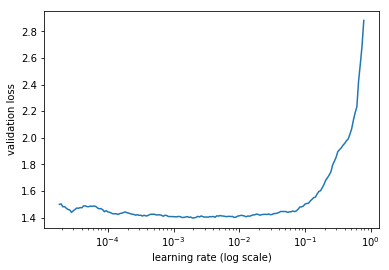

In [48]:
lrf=learn.lr_find()
learn.sched.plot()

In [52]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.448863   1.311074   0.534361  
    1      1.405124   1.303028   0.538767                   
    2      1.396005   1.306464   0.535683                   
    3      1.402845   1.303234   0.547137                   
    4      1.372364   1.297798   0.544934                   
    5      1.342952   1.290582   0.542731                   
    6      1.379837   1.28929    0.546696                   


[array([1.28929]), 0.5466960388395755]

In [53]:
learn.save('299_12cls_unf_bs48')

In [ ]:
learn.load('299_12cls_unf_bs48')

In [ ]:
learn.fit(lr, 10, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.372671   1.290845   0.547577  
    1      1.380739   1.278982   0.542291                   
    2      1.368688   1.279418   0.546696                   
    3      1.367094   1.272629   0.548018                   
    4      1.345491   1.272921   0.553304                   
    5      1.333466   1.267104   0.553744                   
    6      1.334859   1.264128   0.553304                   
    7      1.371418   1.269992   0.547137                   
    8      1.364804   1.263759   0.559031                   
    9      1.343403   1.25903    0.561674                   
    10     1.344066   1.254189   0.557269                   
    11     1.332897   1.248577   0.552423                   
    12     1.28492    1.243182   0.556388                   
    13     1.310286   1.241637   0.554185                   
    14     1.273155   1.241403   0.554626                   
    15     1.35625    1.242023   0.557269

This dataset is so similar to ImageNet dataset. Training convolution layers doesn't help much. We are not going to unfreeze.

## Create submission

https://youtu.be/9C06ZPF8Uuc?t=1905

In [ ]:
data.classes

In [ ]:
data.test_ds.fnames

In [ ]:
log_preds, y = learn.TTA(is_test=True) # use test dataset rather than validation dataset
probs = np.mean(np.exp(log_preds),0)
#accuracy_np(probs, y), metrcs.log_loss(y, probs) # This does not make sense since test dataset has no labels

In [ ]:
probs.shape # (n_images, n_classes)

In [ ]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [ ]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [ ]:
df.head()

In [ ]:
SUBM = f'{PATH}/subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [ ]:
FileLink(f'{SUBM}subm.gz')

## Individual prediction

In [ ]:
fn = data.val_ds.fnames[0]
fn

In [ ]:
Image.open(PATH + fn).resize((150, 150))

In [ ]:
# Method 1.
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
np.argmax(preds)

In [ ]:
learn.data.classes[np.argmax(preds)]

In [ ]:
# Method 2.
trn_tfms, val_tfms = tfms_from_model(arch, sz)
im = val_tfms(open_image(PATH + fn)) # open_image() returns numpy.ndarray
preds = learn.predict_array(im[None])
np.argmax(preds)